# Wizualizacja danych

http://smarterpoland.pl/index.php/2019/12/najgorszy-wykres-2019/

http://smarterpoland.pl/index.php/2020/12/plebiscyt-na-najgorszy-wykres-roku-2020/

http://smarterpoland.pl/index.php/2021/12/plebiscyt-na-najgorszy-wykres-roku-2021/

http://www.biecek.pl/Eseje/

Factfulness: Ten Reasons We're Wrong About the World – and Why Things Are Better Than You Think

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import stats

*Wykres* będzie dla nas reprezentacją *danych*. Wykres składa się z *elementów*, takich jak słupki, koła, ikony. 

Dane składają się ze *zmiennych* (cena, waga, temperatura, prędkość) które opisane są w *skalach*. 

Wizualizacja danych polega na *przedstawieniu/zakodowaniu* danych za pomocą *cech* elementów wykresów.'



# Skale pomiarowe

* **skala ilorazowa** (ang.*ratio scale*) - skala, w której istnieje fizyczny sens zarówno dla różnic i ilorazów, np. cena produktu (kilogram jabłek może być o 2 zł tańszy od kilograma gruszek, kilogram ogórków jest dwa razy tańszy od kilograma pomidorów);

* **skala przedziałowa** (ang. *interval scale*) - skala, w której istnieje fizyczny sens różnic wartości, ale nie ich ilorazów, np. daty, temperatura (I Wojna Światową rozpoczęła się 25 lat przed II Wojną Światową);

* **skala porządkowa** (ang. *ordinal scale*) - skala, dla której istnieje fizyczny sens dla kolejności wartości, ale nie dla ich różnic czy ilorazów, np. wykształcenie;

* **skala nominalna** (ang. *nominal scale*) - skala, w której wartości można zapisać za pomocą liczb, ale nie ma fizycznej interpretacji dla kolejności tych wartości, różnic czy ilorazów, np. numer PESEL;

# Typy wykresów

### Wykres punktowy (ang. *scatter plot*)
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

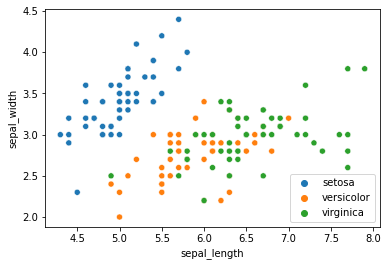

In [3]:
df = sns.load_dataset('iris')
 
sns.scatterplot(x="sepal_length", y="sepal_width", data=df, hue='species', legend=True)
plt.legend(loc='lower right')

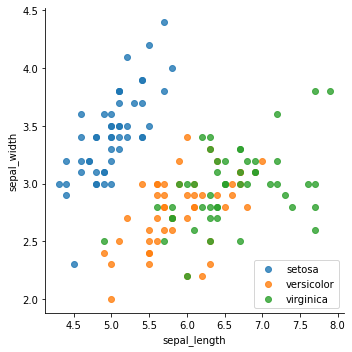

In [4]:
#inaczej
 
sns.lmplot(x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
plt.legend(loc='lower right')

### Wykres słupkowy (ang. *bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [5]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
?sns.barplot

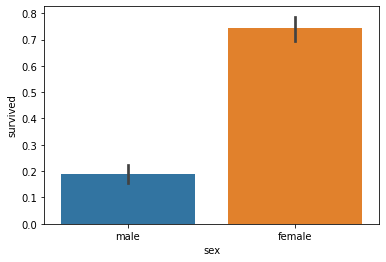

In [7]:
sns.barplot(x="sex", y="survived", data=titanic) #wykres z podziałem na płcie

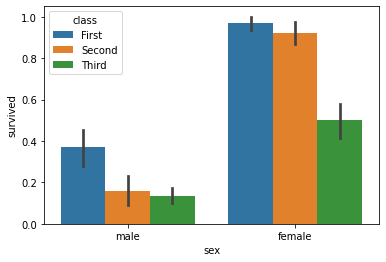

In [8]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic) #wykres z podziałem na klasy i płcie

### Skumulowany wykres słupkowy (ang. *stacked bar plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

In [9]:
grouped_titanic = titanic.groupby(['class', 'sex'])['survived'].agg('sum')
grouped_titanic

class   sex   
First   female    91
        male      45
Second  female    70
        male      17
Third   female    72
        male      47
Name: survived, dtype: int64

In [10]:
sex = np.unique(titanic['sex'])

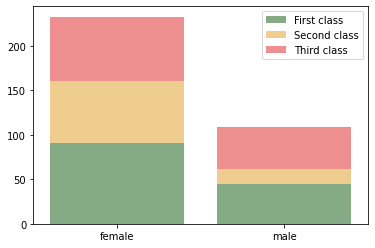

In [11]:
sns.barplot(x=sex, y=grouped_titanic['First'].values, label="First class",
            color="darkgreen", alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Second'].values, 
            bottom=grouped_titanic['First'].values, label='Second class',
            color="orange", alpha=0.5)
sns.barplot(x=sex, y=grouped_titanic['Third'].values, 
            bottom=grouped_titanic['First'].values + grouped_titanic['Second'].values, 
            label='Third class', color="red", alpha=0.5)
plt.legend()
plt.show()

### Histogram (ang. *histogram*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

In [12]:
?sns.distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


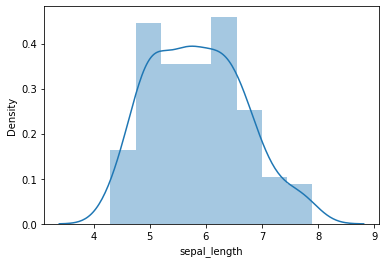

In [13]:
df = sns.load_dataset('iris')
  
sns.distplot(df["sepal_length"], kde=True, rug=False)
plt.show()
#wykres słupkowy z nałożoną empiryczną gęstością

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


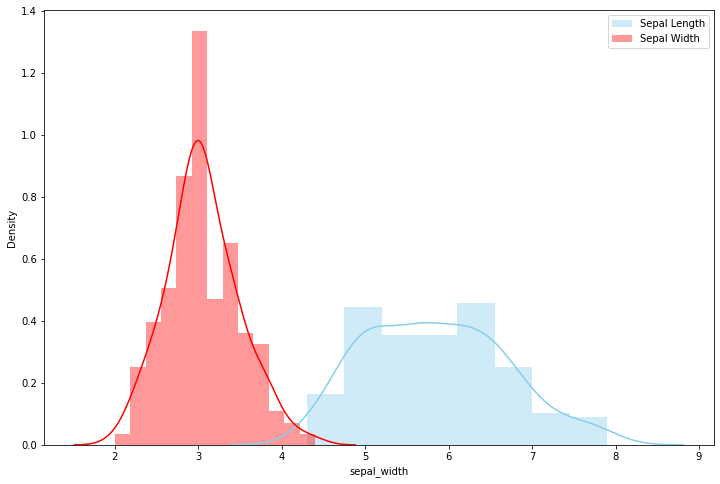

In [14]:
plt.figure(figsize=(12, 8))

sns.distplot( df["sepal_length"] , color="skyblue", label="Sepal Length")
sns.distplot( df["sepal_width"] , color="red", label="Sepal Width")
plt.legend()
#z podziałem na różne gatunki

### Estymator jądrowy gęstości (ang. *kernel density plot*) 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna

In [15]:
?sns.kdeplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.05 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


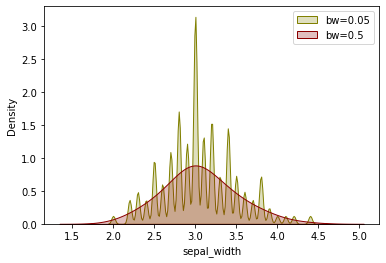

In [16]:
df = sns.load_dataset('iris')
 
# bw - parametr wygładzania
sns.kdeplot(df['sepal_width'], shade=True, bw=.05, color="olive")
sns.kdeplot(df['sepal_width'], shade=True, bw=.5, color="darkred")
plt.legend(["bw=0.05", "bw=0.5"])
plt.show()
#gęstość jądrowa, trzeba uważać, żeby nie dać szerokości okna za małej (zbyt czuły, poszarpany wykres)
# ani zbyt dużej (za mało czuły, zbyt gładki)  

### Pair plot 
$X$ - zmienna numeryczna, $Y$ - zmienna numeryczna.

<Figure size 1296x720 with 0 Axes>

<Figure size 800x640 with 0 Axes>

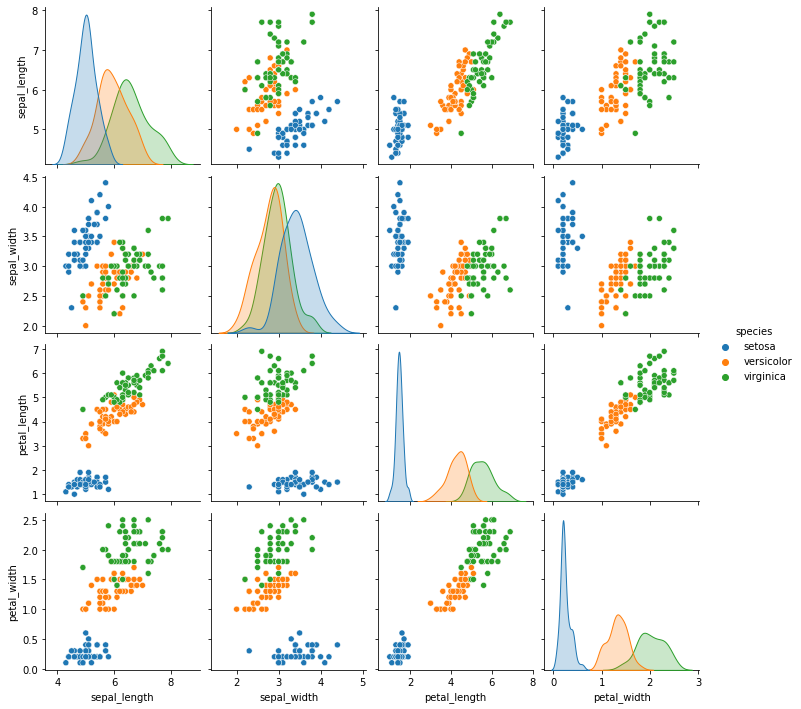

In [17]:
plt.figure(figsize=(18, 10))
df = sns.load_dataset('iris')

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="species")
plt.show()
#scatterpoly, a jeśli mamy ta sam zmienna vs ta sama to mamy wykresy gęstości z podziałem na kategorie

### Wykres pudełkowy (ang. *boxplot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

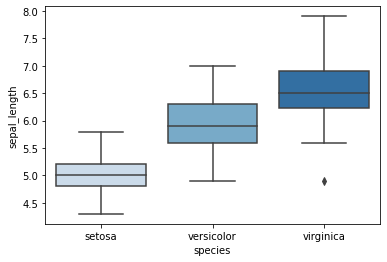

In [18]:
df = sns.load_dataset('iris')
 
sns.boxplot( x=df["species"], y=df["sepal_length"], palette="Blues")

Text(0, 0.5, 'Total bill')

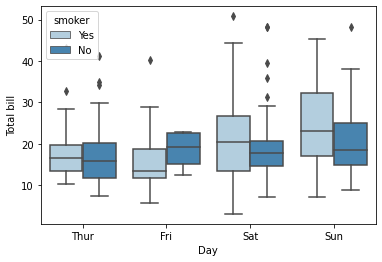

In [19]:
df = sns.load_dataset('tips')
 
# Grouped boxplot
sns.boxplot(x="day", y="total_bill", hue="smoker", data=df, palette="Blues")
plt.xlabel("Day")
plt.ylabel("Total bill")

### Wykres skrzypcowy (ang. *violin plot*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna numeryczna.

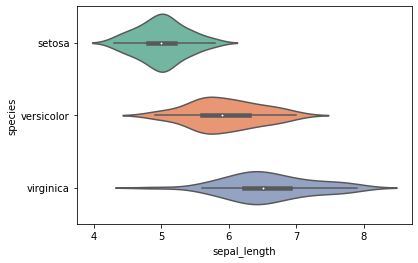

In [20]:
df = sns.load_dataset('iris')

# plt.figure(figsize=(18, 10))
sns.violinplot( y=df["species"], x=df["sepal_length"], palette="Set2")

### Mapa termiczna (ang. *heat map*) 
$X$ - zmienna kategoryczna, $Y$ - zmienna kategoryczna, $Z$ - zmienna numeryczna.

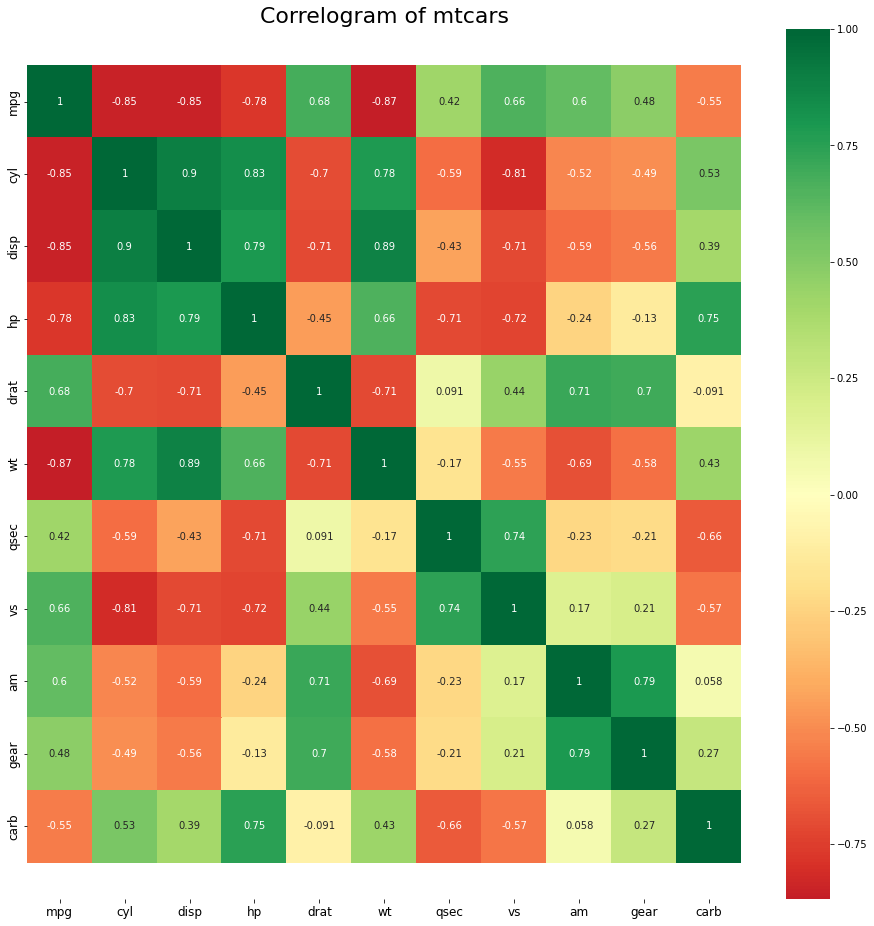

In [21]:
df = pd.read_csv("mtcars.csv")

# Plot
plt.figure(figsize=(16, 16))
ax = sns.heatmap(df.corr(), 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

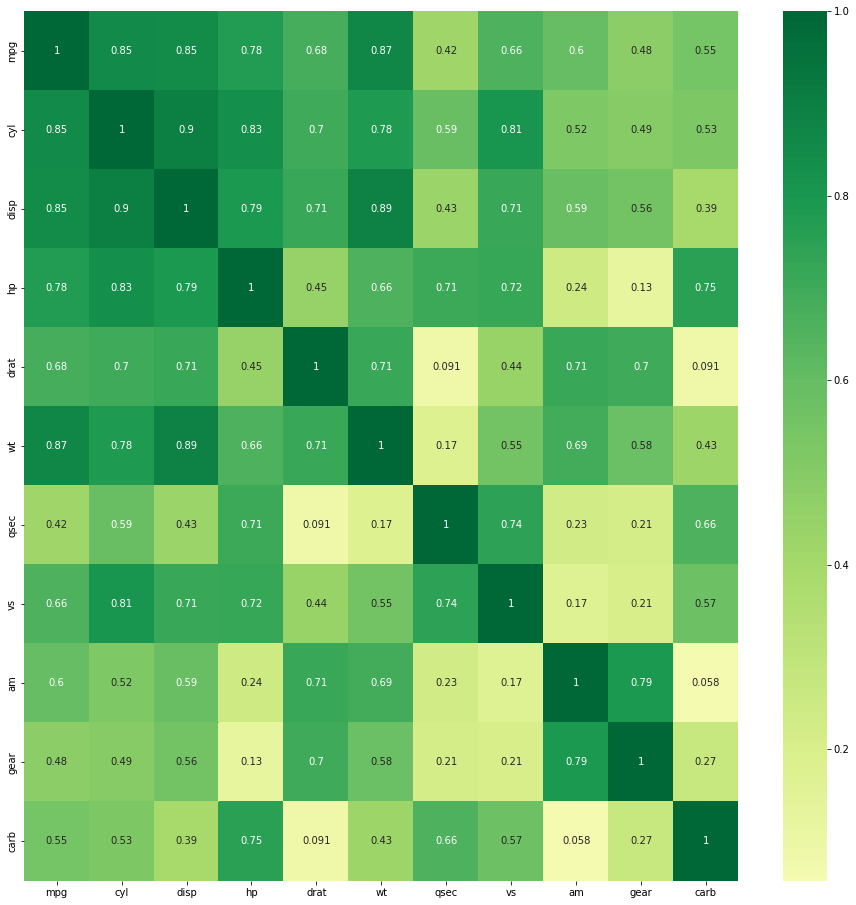

In [22]:
#Na tym im bardziej zielono tym bardziej skorelowane (dodatnio lub ujemnie)
# Plot
plt.figure(figsize=(16, 16))
ax = sns.heatmap(np.abs(df.corr()), 
                 xticklabels=df.corr().columns, 
                 yticklabels=df.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

# Zadanie - `nycflights13`

Zbiór danych `nycflights13` (https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf) zawiera dane dotyczące wszystkich lotów rozpoczynających się w Nowym Jorku w 2013 r. 

Obejmuje metadane dotyczące linii lotniczych, lotnisk, pogody i samolotów.

Narysuj wykresy prezentujące:

    1. dzienną liczbę lotów;
    
    2. udział zrealizowanych lotów w każdym miesiącu;
    
    3. udział linii lotnicznych w zrealizowanych lotach;
    
    4. udział lotów, które wystartowały po czasie, wystartowały przed czasem, wystartowały na czas w każdym miesiącu.
    
    5. rozkład opóźnienia odlotu względem opóźnienia przylotu;
    
    6. porównanie rozkładu opóźnienia odlotu i przylotu w każdym dniu tygodnia;
    
    7. związek opóźnienia startu samolotu a prędkością wiatru.

In [59]:
nycflights13 = pd.read_csv("nycflights13.csv")

In [60]:
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00


### 1. Dzienna liczba lotów

In [61]:
import datetime

In [62]:
nycflights13['date'] = nycflights13.apply(lambda row: datetime.datetime(row.year, row.month, row.day), axis=1)
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01


In [63]:
flights_per_day = nycflights13.groupby('date')['year'].count()
flights_per_day

date
2013-01-01    842
2013-01-02    943
2013-01-03    914
2013-01-04    915
2013-01-05    720
             ... 
2013-12-27    963
2013-12-28    814
2013-12-29    888
2013-12-30    968
2013-12-31    776
Name: year, Length: 365, dtype: int64

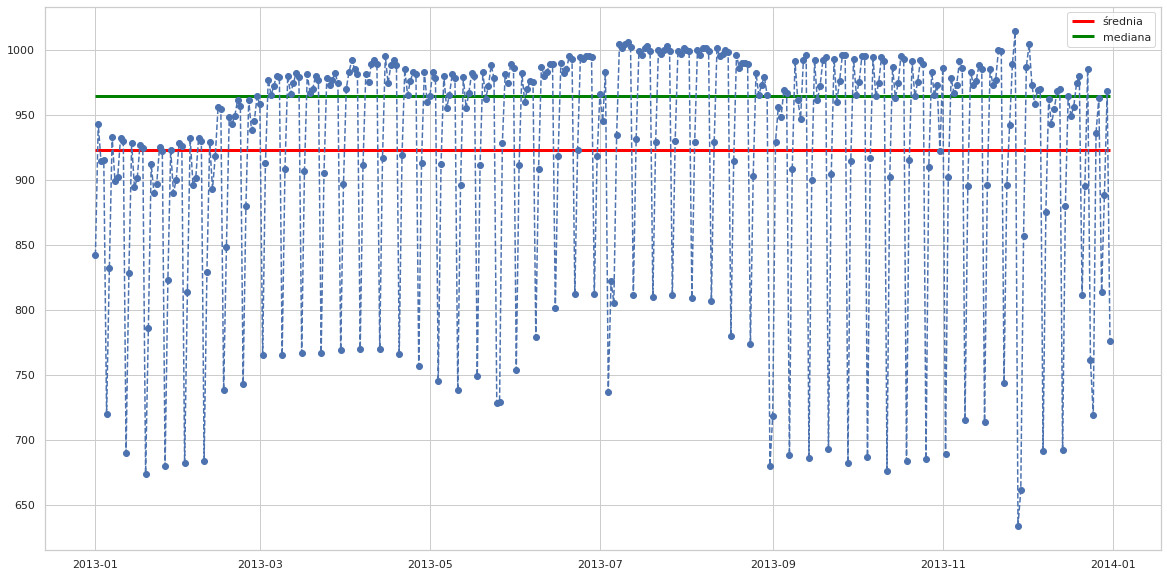

In [64]:
plt.figure(figsize = (20,10))
plt.plot(flights_per_day,'o--')
plt.hlines(xmin = flights_per_day.index.min(),xmax = flights_per_day.index.max(),y = np.mean(flights_per_day),
           color = 'red',label = 'średnia', lw = 3)
plt.hlines(xmin = flights_per_day.index.min(),xmax = flights_per_day.index.max(),y = np.median(flights_per_day),
           color = 'green',label = 'mediana', lw = 3)
plt.legend()
plt.show()

### 2. Stosunek zrealizowanych lotów w każdym miesiącu

In [66]:
flights_per_month = nycflights13.groupby('month')['year'].count()

In [67]:
flights_per_month

month
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: year, dtype: int64

In [68]:
?plt.pie

In [69]:
import calendar

[]

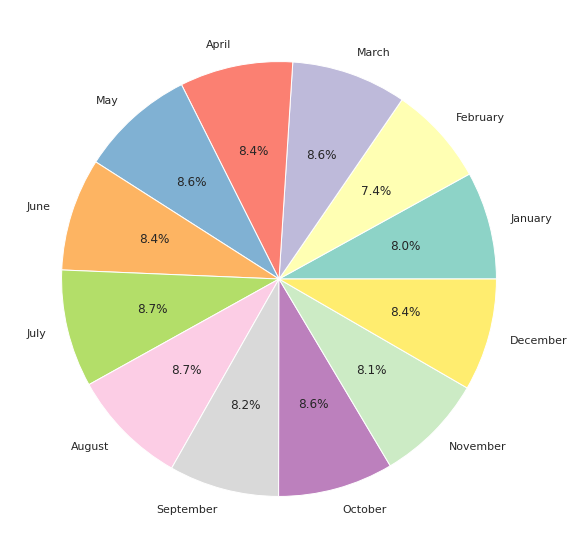

In [70]:
plt.figure(figsize=(20, 10))

cs=cm.Set3(np.arange(len(flights_per_month) + 1))

plt.pie(flights_per_month, labels=[calendar.month_name[i] for i in flights_per_month.index], 
        colors=cs, autopct='%1.1f%%')
plt.plot()

In [ ]:
?sns.barplot

[]

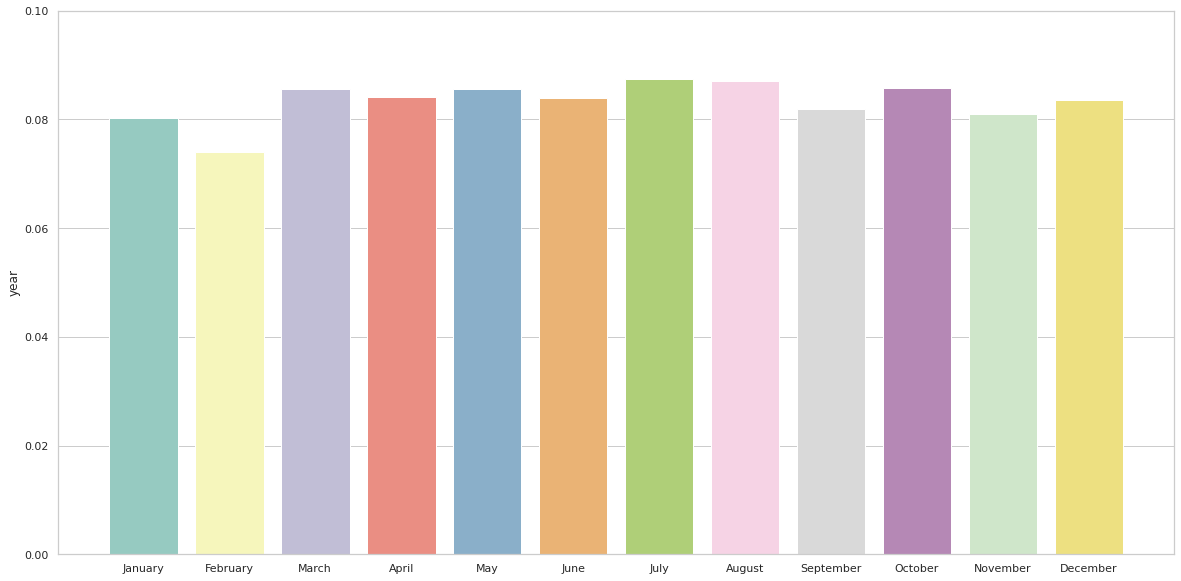

In [71]:
plt.figure(figsize=(20, 10))

cs=cm.Set3(np.arange(len(flights_per_month) + 1))

sns.barplot(x=[calendar.month_name[i] for i in flights_per_month.index], 
            y=flights_per_month / flights_per_month.sum(), 
           palette='Set3')
plt.ylim([0, .1])
plt.plot()

### 3. Udział linii lotnicznych w zrealizowanych lotach

In [72]:
flights_per_carrier = nycflights13.groupby('carrier_name')['year'].count()

In [73]:
flights_per_carrier.index

Index(['AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'American Airlines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.',
       'Envoy Air', 'ExpressJet Airlines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'US Airways Inc.',
       'United Air Lines Inc.', 'Virgin America'],
      dtype='object', name='carrier_name')

[]

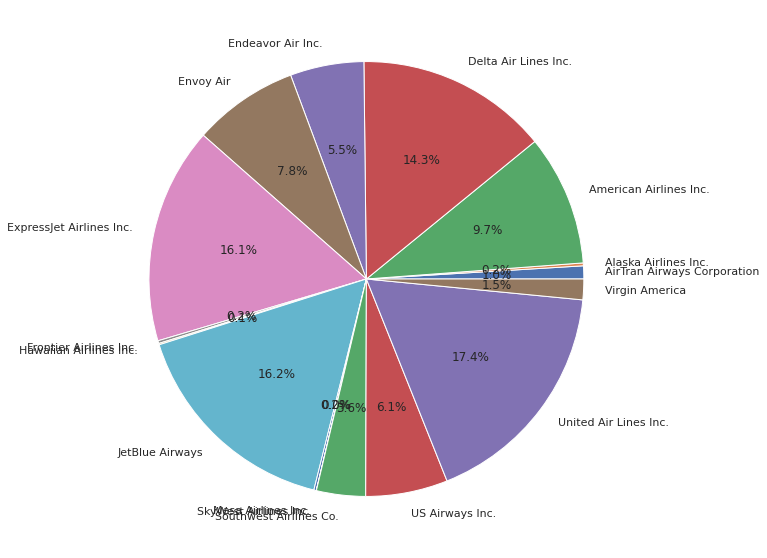

In [74]:
plt.figure(figsize=(20, 10))

plt.pie(flights_per_carrier, labels=flights_per_carrier.index, 
        autopct='%1.1f%%')
plt.plot()

In [75]:
flights_per_carrier = flights_per_carrier.reset_index()
flights_per_carrier.columns = ['carrier_name', 'count']

In [76]:
OTHER_GROUP_THRESHOLD = 0.05

all_flights = sum(flights_per_carrier['count'])


flights_per_carrier['carrier_group_name'] = flights_per_carrier.apply(lambda row: row['carrier_name'] 
                          if row['count'] / all_flights >= OTHER_GROUP_THRESHOLD 
                          else 'Other', 
                          axis=1)

In [77]:
flights_per_carrier_group = flights_per_carrier.groupby('carrier_group_name')['count'].sum()

[]

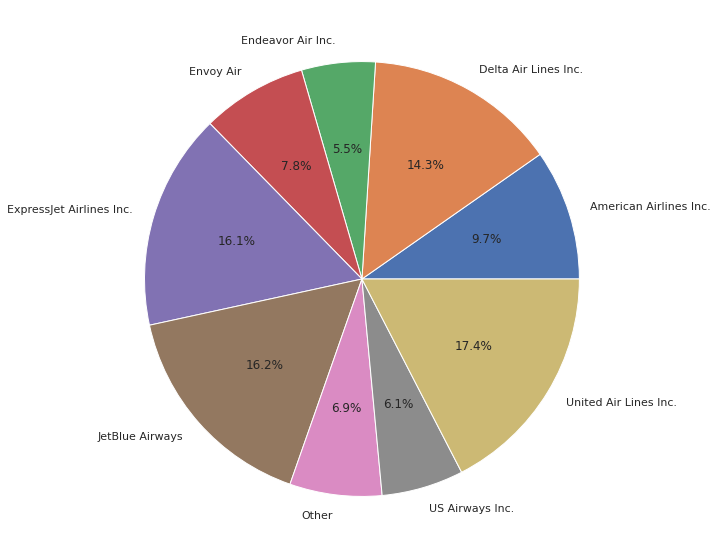

In [78]:
plt.figure(figsize=(20, 10))

plt.pie(flights_per_carrier_group, labels=flights_per_carrier_group.index, 
        autopct='%1.1f%%')
plt.plot()

### 4. Stosunek lotów, które
 - wystartowały po czasie, 
 - wystartowały przed czasem, 
 - wystartowały na czas 

w każdym miesiącu.

In [79]:
nycflights13

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,...,55.04,63.21,190.0,11.50780,NaN,0.0,1016.6,10.0,2013-09-30 14:00:00,2013-09-30
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,...,53.06,65.37,200.0,6.90468,NaN,0.0,1015.8,10.0,2013-09-30 22:00:00,2013-09-30
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,...,48.02,46.99,70.0,5.75390,NaN,0.0,1016.7,10.0,2013-09-30 12:00:00,2013-09-30
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,...,48.92,52.35,70.0,8.05546,NaN,0.0,1017.5,10.0,2013-09-30 11:00:00,2013-09-30


In [80]:
sum(np.isnan(nycflights13.dep_delay) | nycflights13.dep_delay == 0)

16514

In [81]:
TIME_THRESHOLD = 0

grouped = nycflights13.groupby('month')['dep_delay']

dep_delay_count_per_month = pd.DataFrame()
dep_delay_count_per_month['on_time'] = grouped.agg(lambda x: sum(np.isnan(x) | ((x >= -TIME_THRESHOLD) & (x <= TIME_THRESHOLD))))
dep_delay_count_per_month['delay'] = grouped.agg(lambda x: sum(x > TIME_THRESHOLD))
dep_delay_count_per_month['ahead'] = grouped.agg(lambda x: sum(x < -TIME_THRESHOLD))
dep_delay_count_per_month['N'] = dep_delay_count_per_month.apply(lambda row: sum(row), axis=1) 

In [82]:
dep_delay_count_per_month.head()

,on_time,delay,ahead,N
month,,,,
1,1930,9662,15412,27004
2,2430,9124,13397,24951
3,2293,11209,15332,28834
4,1911,10543,15876,28330
5,1956,11291,15549,28796


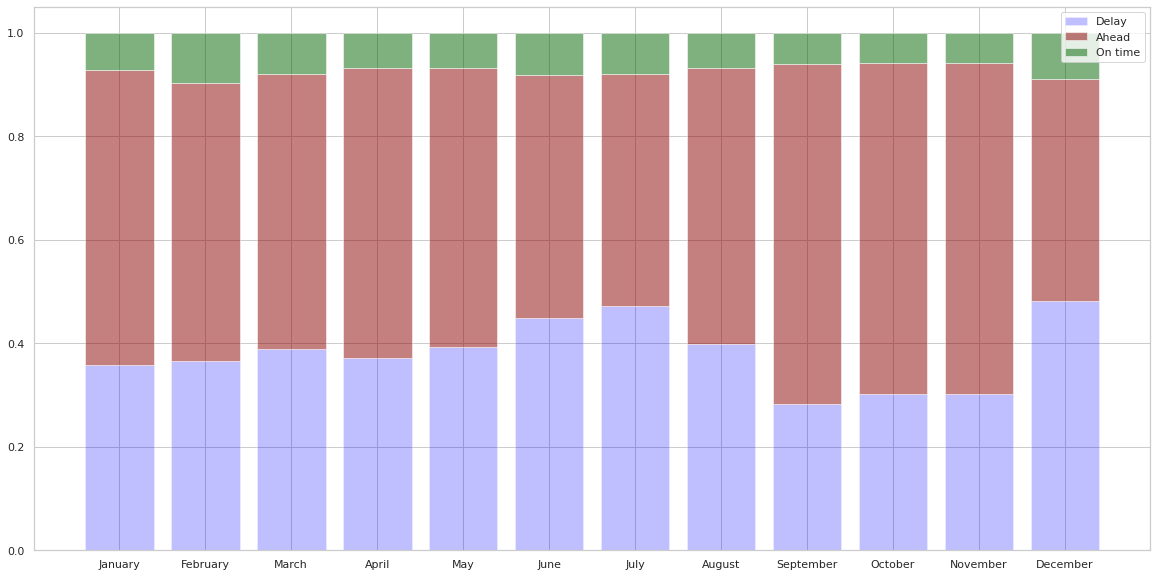

In [83]:
plt.figure(figsize=(20, 10))

freq_delay = dep_delay_count_per_month.delay / dep_delay_count_per_month.N
freq_ahead = dep_delay_count_per_month.ahead / dep_delay_count_per_month.N
freq_on_time = dep_delay_count_per_month.on_time / dep_delay_count_per_month.N

months = calendar.month_name[1:13]

plt.bar(months, freq_delay, label="Delay", color='blue', alpha=0.25)
plt.bar(months, freq_ahead, label="Ahead", bottom=freq_delay, color='darkred', alpha=0.5)
plt.bar(months, freq_on_time, label="On time", bottom=freq_delay + freq_ahead, color='darkgreen', alpha=0.5)

plt.legend()
plt.show()

### 5. Rozkład opóźnienia odlotu względem opóźnienia przylotu;

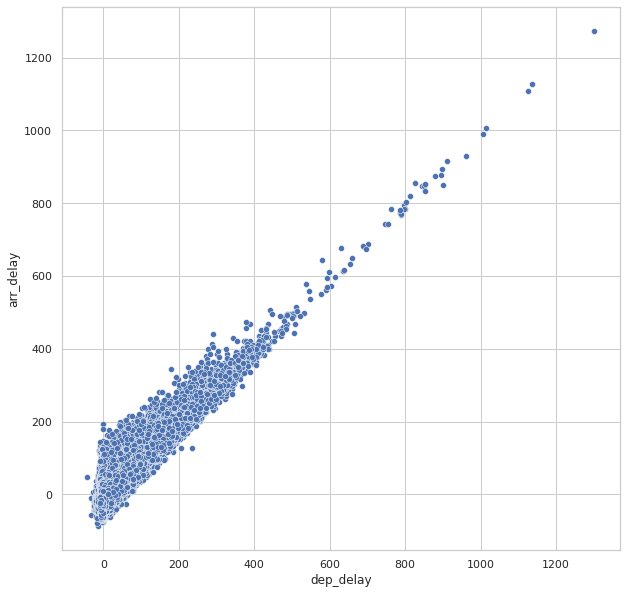

In [84]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x = "dep_delay", y ="arr_delay", data=nycflights13)
plt.show()

In [85]:
selected_carriers = flights_per_carrier.carrier_group_name[flights_per_carrier.carrier_group_name != 'Other']
selected_carriers

2       American Airlines Inc.
3         Delta Air Lines Inc.
4            Endeavor Air Inc.
5                    Envoy Air
6     ExpressJet Airlines Inc.
9              JetBlue Airways
13             US Airways Inc.
14       United Air Lines Inc.
Name: carrier_group_name, dtype: object

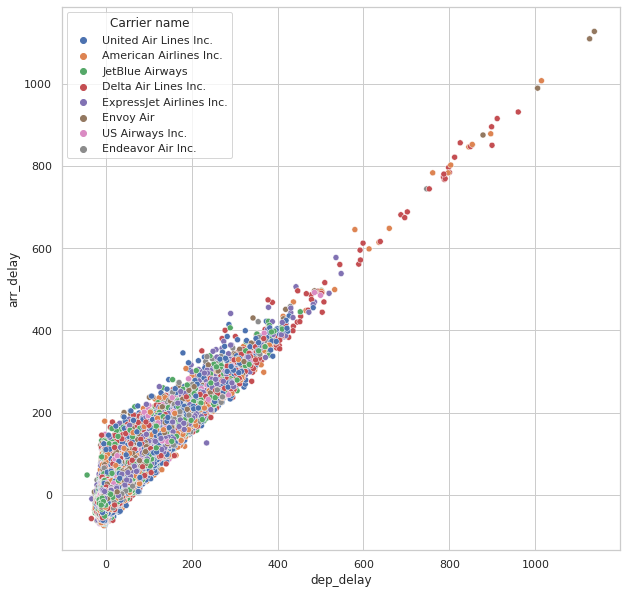

In [86]:
plt.figure(figsize=(10, 10))

sns.scatterplot(x = "dep_delay", y ="arr_delay", hue="carrier_name",
                data=nycflights13[nycflights13.carrier_name.isin(selected_carriers)])
plt.legend(title="Carrier name")
plt.show()

### 6. Porównanie rozkładu opóźnienia odlotu i przylotu w każdym dniu tygodnia

In [87]:
nycflights13['weekday'] = nycflights13 \
    .apply(lambda row: calendar.day_abbr[row.date.weekday()], axis=1)
nycflights13.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour.y,date,weekday
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01 05:00:00,2013-01-01,Tue
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01 05:00:00,2013-01-01,Tue
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01,Tue
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01 05:00:00,2013-01-01,Tue
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01 06:00:00,2013-01-01,Tue


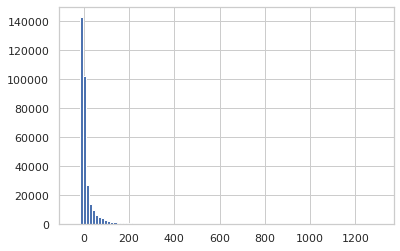

In [88]:
plt.hist(nycflights13.dep_delay, bins=100)
plt.show()

In [ ]:
?sns.boxplot

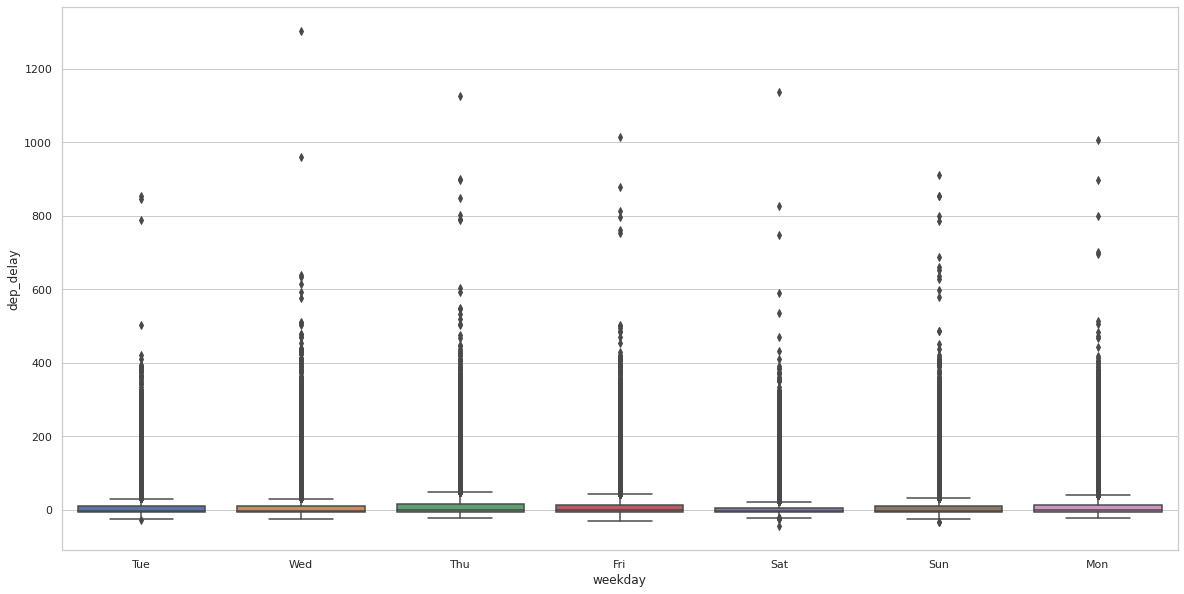

In [89]:
plt.figure(figsize=(20, 10))

sns.boxplot(y='dep_delay', x='weekday', data=nycflights13)

In [90]:
nycflights13_delay = pd.melt(nycflights13, id_vars=['weekday'],
                             value_vars=['dep_delay','arr_delay'], var_name='delay')

In [91]:
nycflights13_delay

,weekday,delay,value
0,Tue,dep_delay,2.0
1,Tue,dep_delay,4.0
2,Tue,dep_delay,2.0
3,Tue,dep_delay,-1.0
4,Tue,dep_delay,-6.0
...,...,...,...
673547,Mon,arr_delay,NaN
673548,Mon,arr_delay,NaN
673549,Mon,arr_delay,NaN
673550,Mon,arr_delay,NaN


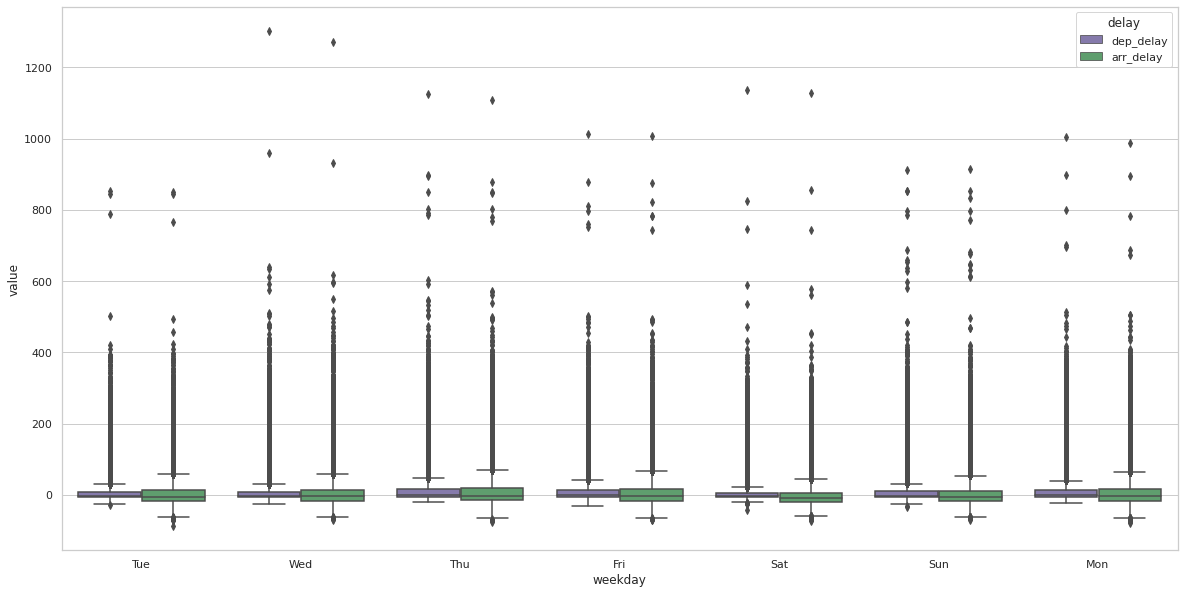

In [92]:
plt.figure(figsize=(20, 10))

sns.boxplot(y='value', x='weekday',  hue="delay", palette=["m", "g"], data=nycflights13_delay)
plt.show()

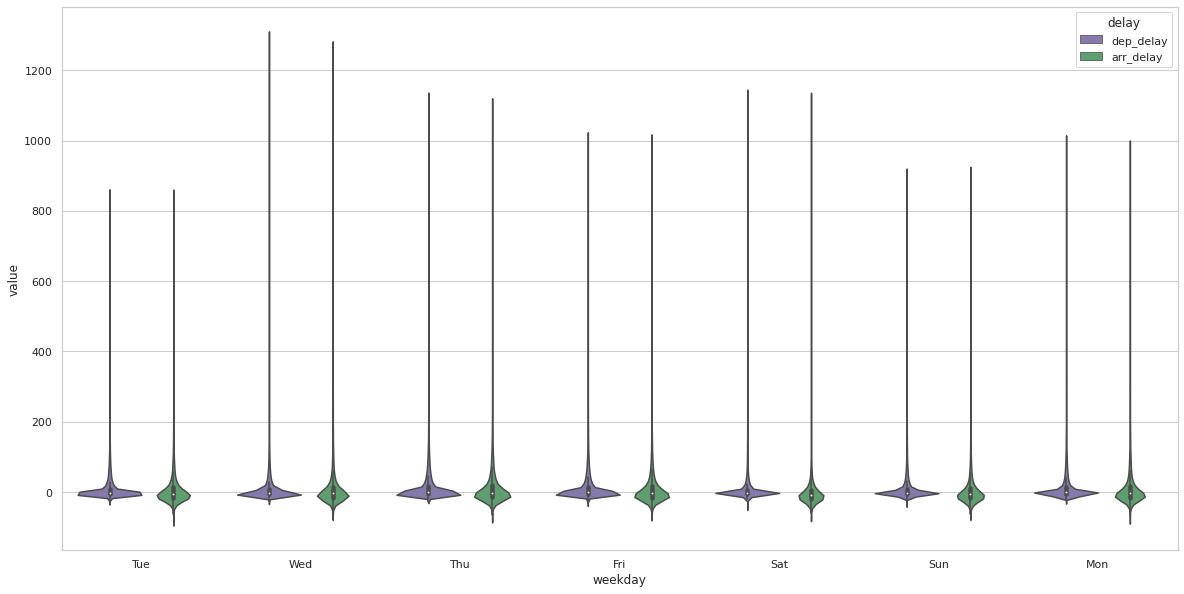

In [93]:
plt.figure(figsize=(20, 10))

sns.violinplot(y='value', x='weekday',  hue="delay", palette=["m", "g"], data=nycflights13_delay)
plt.show()

### 7. Związek opóźnienia startu samolotu a prędkością wiatru.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


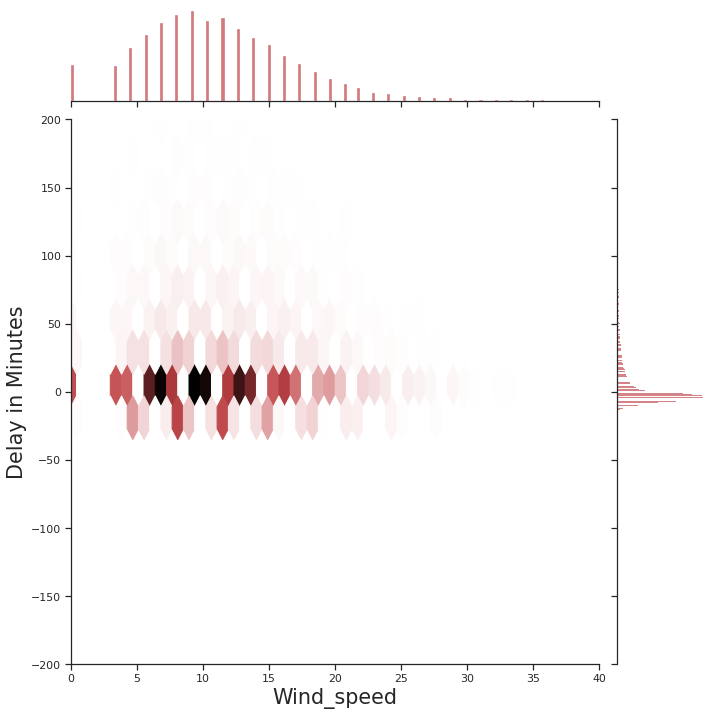

In [94]:
from scipy.stats import pearsonr

sns.set(style="ticks")

g = sns.jointplot(x = "wind_speed", y = "dep_delay", kind="hex", data=nycflights13,  
                  color='r', size=10, ylim=(-200, 200), xlim = (0, 40))
g.set_axis_labels(xlabel = 'Wind_speed', ylabel = 'Delay in Minutes', fontsize = 'xx-large')
plt.show()

**Dla chętnych**: Rozszerzone dane na temat lotów można znaleźć: https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236. 

## Zadanie -  Największe miasta w Polsce pod względem liczby ludności
stan na 1 stycznia 2019: https://pl.wikipedia.org/wiki/Miasta_w_Polsce

Przedstaw na wykresie informacje na temat liczby ludności w 10 największych miastach w Polsce.

In [95]:
miasta_w_polsce = pd.DataFrame({
    'lp': np.arange(1, 11, 1),
    'miasto': ['Warszawa', 'Kraków', 'Łodź', 'Wrocław', 'Poznań', 'Gdańsk', 'Szczecin', 'Bydgoszcz', 
              'Lublin', 'Białystok'],
    'ludnosc': [1783321, 774839, 682679, 641607, 535802, 468158, 402067, 349021, 339770, 297356]
})
miasta_w_polsce

,lp,miasto,ludnosc
0,1,Warszawa,1783321
1,2,Kraków,774839
2,3,Łodź,682679
3,4,Wrocław,641607
4,5,Poznań,535802
5,6,Gdańsk,468158
6,7,Szczecin,402067
7,8,Bydgoszcz,349021
8,9,Lublin,339770
9,10,Białystok,297356


In [ ]:
?plt.bar

In [ ]:
?plt.barh

(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000.]),
 <a list of 9 Text major ticklabel objects>)

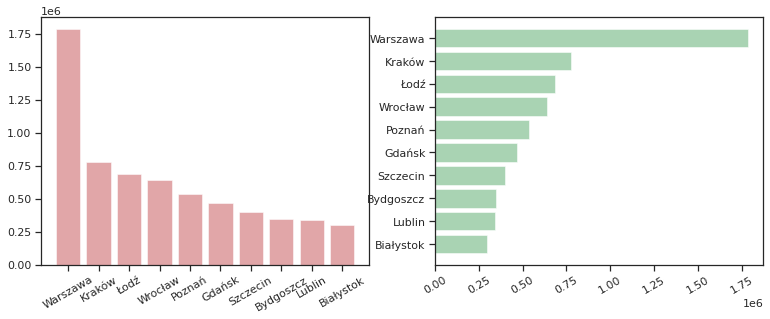

In [96]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
plt.bar(miasta_w_polsce.miasto, miasta_w_polsce.ludnosc, color='r', alpha=0.5)
plt.xticks(rotation=30)

plt.subplot(232)
plt.barh(miasta_w_polsce.miasto, miasta_w_polsce.ludnosc, color='g', alpha=0.5)
plt.gca().invert_yaxis()
plt.xticks(rotation=30)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


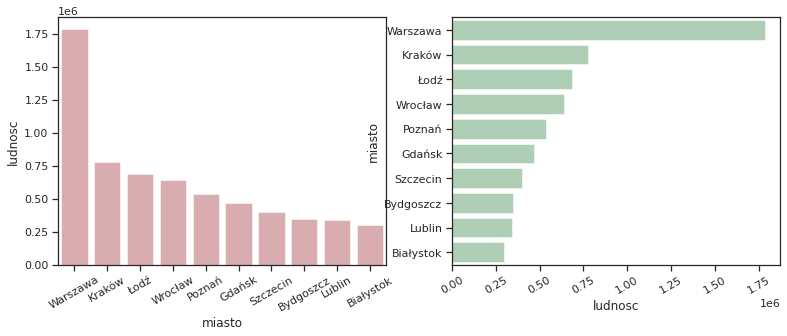

In [97]:
plt.figure(figsize=(20, 10))

plt.subplot(231)
sns.barplot(miasta_w_polsce.miasto, miasta_w_polsce.ludnosc, color='r', alpha=0.5)
plt.xticks(rotation=30)

plt.subplot(232)
sns.barplot(miasta_w_polsce.ludnosc, miasta_w_polsce.miasto, color='g', alpha=0.5)
plt.xticks(rotation=30)
plt.show()

## Zadanie - Absolwenci  
Wczytaj dane `absolwenci_kierunek_20182019.csv` opisujące liczbe absolwentów wybranych kierunków w roku akademickim 2018/2019.

Przedstaw na wykresie:

a) proporcje absolwentów względem kierunku;

b) proporcje absolwentów względem kierunku i płci.

*Źródło danych*: https://stat.gov.pl/obszary-tematyczne/edukacja/edukacja/szkolnictwo-wyzsze-w-roku-akademickim-20182019-wyniki-wstepne,8,6.html

In [98]:
absolwenci = pd.read_csv('absolwenci_kierunek_20182019.csv')
absolwenci

,Kierunek,Ogolem,Kobiety
0,Kształcenie,29071,24478
1,Nauki humanistyczne i sztuka,28250,20991
2,"Nauki społeczne, dziennikarstwo i informacja",35260,25006
3,"Biznes, administracja i prawo",73694,50374
4,"Nauki przyrodnicze, matematyka i statystyka",13406,9625
5,Technologie teleinformacyjne,13520,2179
6,"Technika, przemysł, budownictwo",64639,27585
7,Rolnictwo,6498,3748
8,Zdrowie i opieka społeczna,34513,27440
9,Usługi,27702,15591


In [99]:
?plt.pie

[]

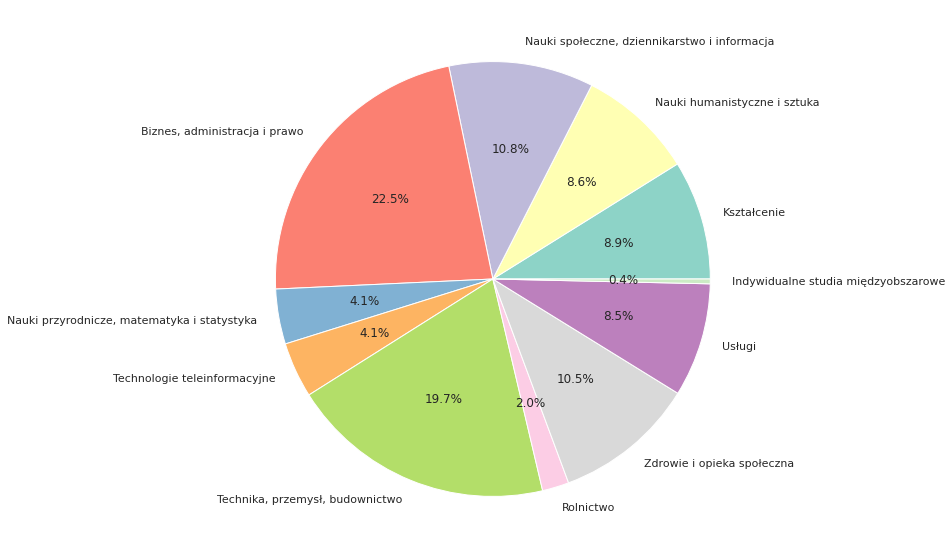

In [100]:
plt.figure(figsize=(20, 10))

cs=cm.Set3(np.arange(absolwenci.shape[0] + 1))

plt.pie(absolwenci.Ogolem, labels=absolwenci.Kierunek, colors=cs, autopct='%1.1f%%')
plt.plot()

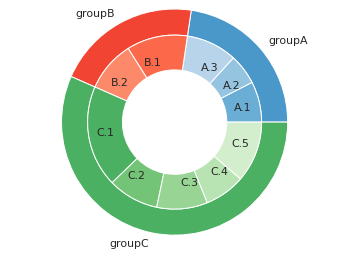

In [101]:
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [102]:
absolwenci['Grupa'] = absolwenci.Kierunek
absolwenci['Grupa'][absolwenci.Ogolem / np.sum(absolwenci.Ogolem) < 0.1] = 'Inne'
absolwenci

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Kierunek,Ogolem,Kobiety,Grupa
0,Kształcenie,29071,24478,Inne
1,Nauki humanistyczne i sztuka,28250,20991,Inne
2,"Nauki społeczne, dziennikarstwo i informacja",35260,25006,"Nauki społeczne, dziennikarstwo i informacja"
3,"Biznes, administracja i prawo",73694,50374,"Biznes, administracja i prawo"
4,"Nauki przyrodnicze, matematyka i statystyka",13406,9625,Inne
5,Technologie teleinformacyjne,13520,2179,Inne
6,"Technika, przemysł, budownictwo",64639,27585,"Technika, przemysł, budownictwo"
7,Rolnictwo,6498,3748,Inne
8,Zdrowie i opieka społeczna,34513,27440,Zdrowie i opieka społeczna
9,Usługi,27702,15591,Inne


In [103]:
absolwenci_grupa = absolwenci.groupby('Grupa').sum()
group_names = absolwenci_grupa.index
group_size = absolwenci_grupa.Ogolem
list(group_size)

[73694, 119608, 35260, 64639, 34513]

In [104]:
subgroup_names = ['Biznes, administracja i prawo'] + list(absolwenci.Kierunek[absolwenci.Grupa == 'Inne']) + \
    ['Nauki społeczne, dziennikarstwo i informacja','Technika, przemysł, budownictwo', 'Zdrowie i opieka społeczna']

subgroup_size = [73694] + list(absolwenci.Ogolem[absolwenci.Grupa == 'Inne']) + [35260, 64639, 34513]
subgroup_labels = [''] + list(absolwenci.Kierunek[absolwenci.Grupa == 'Inne']) + \
    ['', '', '']

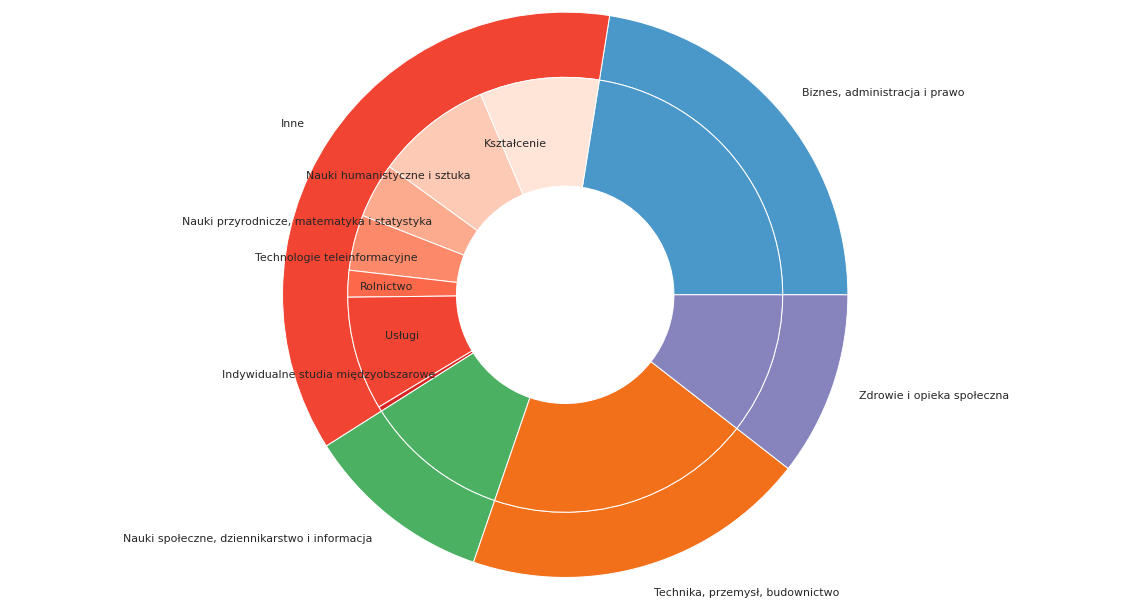

In [105]:
# Create colors
a, b, c, d, e=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Oranges, plt.cm.Purples]
 
# First Ring (outside)
fig, ax = plt.subplots(figsize=(20, 10))
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_labels, labeldistance=0.7, 
                   colors=[a(0.6), b(0.1), b(0.2), b(0.3), b(0.4), b(0.5), b(0.6), b(0.7), 
                           c(0.6), d(0.6), e(0.6)])
plt.setp(mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

b) proporcje absolwentów względem kierunku i płci.

In [106]:
absolwenci['Mezczyzni'] = absolwenci.Ogolem - absolwenci.Kobiety
absolwenci

,Kierunek,Ogolem,Kobiety,Grupa,Mezczyzni
0,Kształcenie,29071,24478,Inne,4593
1,Nauki humanistyczne i sztuka,28250,20991,Inne,7259
2,"Nauki społeczne, dziennikarstwo i informacja",35260,25006,"Nauki społeczne, dziennikarstwo i informacja",10254
3,"Biznes, administracja i prawo",73694,50374,"Biznes, administracja i prawo",23320
4,"Nauki przyrodnicze, matematyka i statystyka",13406,9625,Inne,3781
5,Technologie teleinformacyjne,13520,2179,Inne,11341
6,"Technika, przemysł, budownictwo",64639,27585,"Technika, przemysł, budownictwo",37054
7,Rolnictwo,6498,3748,Inne,2750
8,Zdrowie i opieka społeczna,34513,27440,Zdrowie i opieka społeczna,7073
9,Usługi,27702,15591,Inne,12111


In [107]:
absolwenci.Kierunek = [kierunek.replace(" ", "\n") for kierunek in absolwenci.Kierunek]

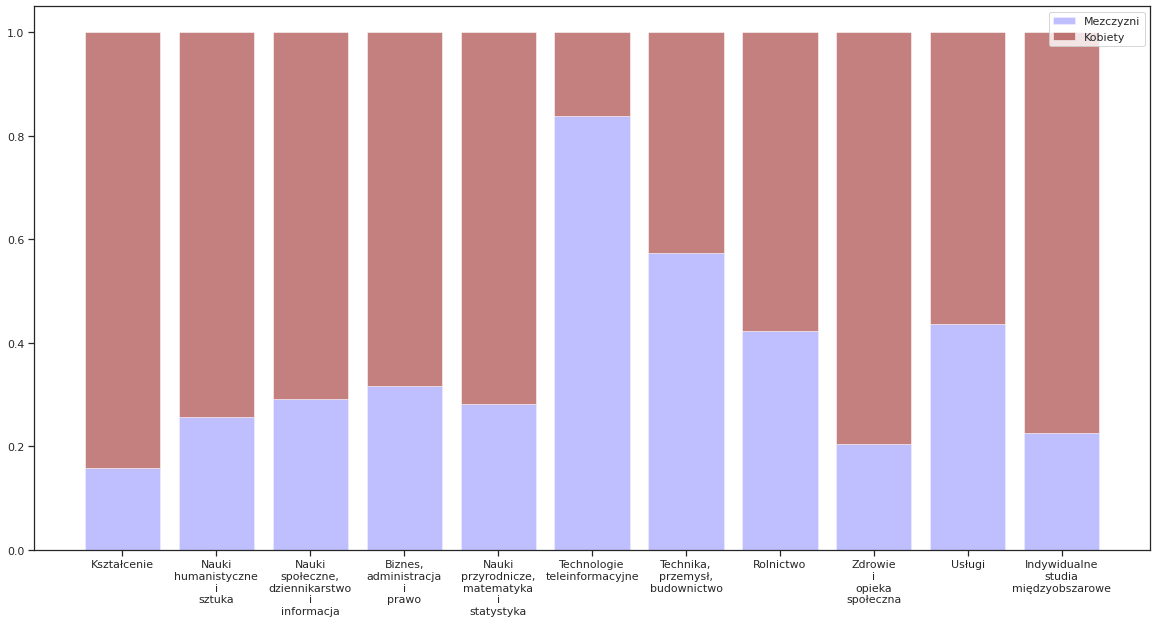

In [108]:
plt.figure(figsize=(20, 10))

freq_men = absolwenci.Mezczyzni / absolwenci.Ogolem
freq_women = absolwenci.Kobiety / absolwenci.Ogolem

plt.bar(absolwenci.Kierunek, freq_men, label="Mezczyzni", color='blue', alpha=0.25)
plt.bar(absolwenci.Kierunek, freq_women, label="Kobiety", bottom=freq_men, color='darkred', alpha=0.5)
plt.legend()
# plt.xticks(rotation=80)
plt.show()

## Zadanie - ceny mieszkań 
Wczytaj dane `ceny_mieszkan_polska.csv` opisujące średnie kwartalne ceny mieszkań za metr kwadratowy w największych miastach w Polsce. 

a) Przedstaw na wykresie zależność ceny od czasu dla cen mieszkań za metr kwadratowy w trzech wybranych miastach w Polsce.

b) Przedstaw na wykresie rozkład ceny w zależności od miasta.

In [109]:
ceny_mieszkan = pd.read_csv('ceny_mieszkan_polska.csv') # rynek pierwotny
ceny_mieszkan.head(5)

,Kwartał,Białystok,Bydgoszcz,Gdańsk,Gdynia,Katowice,Kielce,Kraków,Lublin,Łódź,Olsztyn,Opole,Poznań,Rzeszów,Szczecin,Warszawa,Wrocław,Zielona Góra,7 miast
0,III 2006,2727,3243,5004,4937,3986,2919,6021,3456,3210,4000,3343.0,4770,2862,3215,5873,4750,2754,5427
1,IV 2006,2727,3947,6199,5284,4062,3493,7929,3314,4237,4800,NaN,4827,3401,3679,6095,5759,2869,6143
2,I 2007,4181,4501,6437,6466,4518,3382,8247,3604,4927,5149,NaN,7275,3420,4749,7509,6309,2872,6941
3,II 2007,4725,5700,7999,8934,5181,3902,8129,4143,5453,4776,NaN,7360,4080,5050,8000,6294,4153,8097
4,III 2007,4199,4994,8053,8114,6236,4651,8420,4645,5201,4900,4784.0,6838,4069,5035,8740,6444,4208,8212


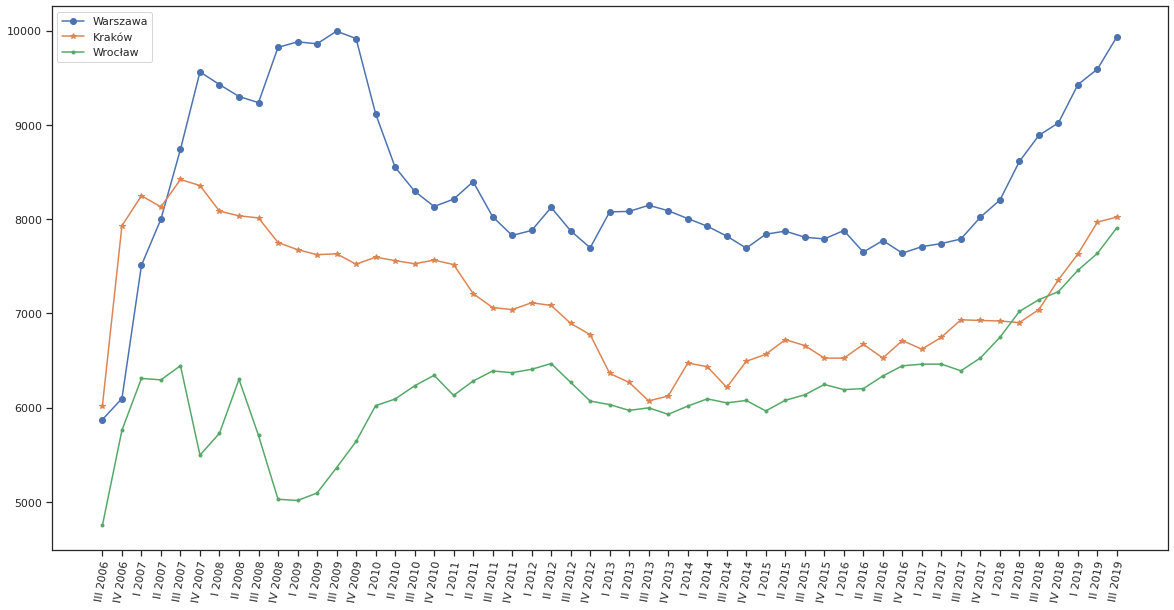

In [110]:
# a)

plt.figure(figsize=(20, 10))

plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Warszawa, 'o-', label="Warszawa")
plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Kraków, '*-', label="Kraków")
plt.plot(ceny_mieszkan.Kwartał, ceny_mieszkan.Wrocław, '.-', label="Wrocław")

plt.legend()
plt.xticks(rotation=80)
plt.show()

In [ ]:
?sns.violinplot

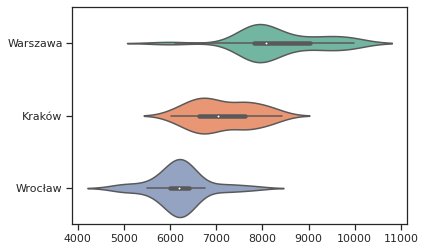

In [111]:
# b)

sns.violinplot(data=ceny_mieszkan[['Warszawa', 'Kraków', 'Wrocław']], orient='h', palette="Set2")

### Zadanie - COVID-19
Wczytaj dane `covid19.csv` zawierające dane na temat liczby dziennych zakażeń oraz liczby zgonów spowodowanych koronawirusem.

a) Przedstaw na wykresie zależność liczby nowych zakażeń koronawirusem od czasu dla kilku wybranych krajów.

b) Przedstaw ranking krajów z największa liczbą stwierdzonych przypadków zakażeń koronawirusem oraz liczbą zgonów spowodowanych koronawirusem.

*Źródło*: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv

In [113]:
covid19 = pd.read_csv('covid19.csv')
covid19.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [114]:
aggr_confirmed = pd.DataFrame(covid19.groupby('Country')['Confirmed'].sum())\
    .sort_values('Confirmed', ascending=False)

aggr_deaths = pd.DataFrame(covid19.groupby('Country')['Deaths'].sum())\
    .sort_values('Deaths', ascending=False)

In [115]:
top_confirmed = aggr_confirmed.head(5) 
top_confirmed = top_confirmed.append(aggr_confirmed[aggr_confirmed.index == 'Poland'])

ts_countries = covid19[[c in top_confirmed.index.values for c in covid19.Country]]
ts_countries.head()

,Date,Country,Confirmed,Recovered,Deaths
36,2020-01-22,China,548,28,17
65,2020-01-22,Germany,0,0,0
84,2020-01-22,Italy,0,0,0
134,2020-01-22,Poland,0,0,0
156,2020-01-22,Spain,0,0,0


In [116]:
ts_countries.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

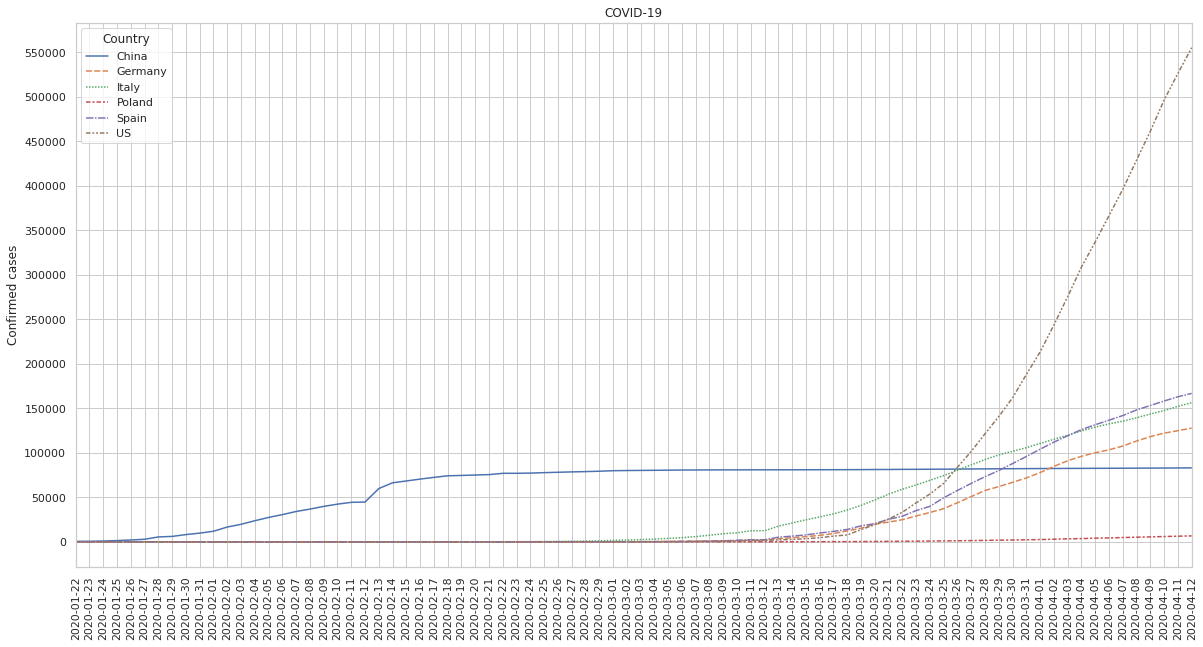

In [117]:
# a)
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))

sns.lineplot(x='Date', y='Confirmed', hue='Country', style="Country", palette="deep", data=ts_countries)
plt.xlim([ts_countries.Date.min(), ts_countries.Date.max()])
plt.title("COVID-19")
plt.xlabel("")
plt.ylabel("Confirmed cases")
plt.xticks(rotation=90)
plt.yticks(ticks=np.arange(0, 600000, 50000))
plt.show()

In [118]:
top_confirmed = aggr_confirmed.head(15) 
top_confirmed = top_confirmed.append(aggr_confirmed[aggr_confirmed.index == 'Poland'])

top_deaths = aggr_deaths.head(15)
top_deaths = top_deaths.append(aggr_deaths[aggr_deaths.index == 'Poland'])

In [ ]:
?sns.axes_style

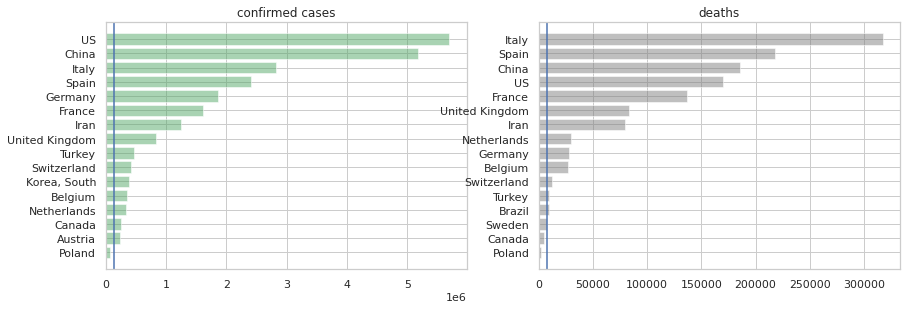

In [119]:
# b)
plt.figure(figsize=(22, 10))

plt.subplot(231)
plt.barh(top_confirmed.index, top_confirmed.Confirmed, color='g', alpha=0.5)
plt.title("confirmed cases")
plt.gca().invert_yaxis()
plt.axvline(float(aggr_confirmed.mean()))

plt.subplot(232)
plt.barh(top_deaths.index, top_deaths.Deaths, alpha=0.5, color='grey')
plt.title("deaths")
plt.gca().invert_yaxis()
plt.axvline(float(aggr_deaths.mean()))
plt.show()

## Case study

Wczytaj dane `salaryData.csv` przedstawiające wysokość zarobków w największych firmach IT. Dokonaj analizy poniższego zbioru danych, m.in.

- sprawdź ogólny rozkład zarobków,
- sprawdź, w której firmie zarabia się najwięcej,
- sprawdź, na jakim stanowisku zarabia się najwięcej,
- sprawdź, w której lokalizacji zarabia się najwięcej,
- porównaj rozkład zarobków dla dwóch/trzech wybranych firm,
- porównaj rozkład dla dwóch/trzech stanowisk (np. Data Scientist vs. Software Engineer),
- porównaj rozkład dla kilku lokalizacji,
- porównaj rozkład dla dwóch/trzech stanowisk dla wybranej lokalizacji.

In [139]:
# https://www.levels.fyi/
# data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
# df = pd.DataFrame(data)

df = pd.read_csv('salaryData.csv')
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127.0,"Redwood City, CA",1.5,1.5,NaN,107.0,20.0,10.0,NaN,NaN,7392.0,807.0,1
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100.0,"San Francisco, CA",5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,7419.0,807.0,2
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310.0,"Seattle, WA",8.0,0.0,NaN,155.0,NaN,NaN,NaN,NaN,11527.0,819.0,3
3,6/13/2017 5:35:36,Uber,Senior,Software Engineer,578.0,"San Francisco, CA",10.0,2.0,NaN,180000.0,1550000.0,9000.0,NaN,Stock based on $48.65 per share.,7419.0,807.0,4
4,6/14/2017 21:22:25,Microsoft,64,Software Engineering Manager,200.0,"Redmond, WA",9.0,9.0,NaN,169000.0,100000.0,30000.0,NaN,NaN,11521.0,819.0,5


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16683 entries, 0 to 16682
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                16683 non-null  object 
 1   company                  16683 non-null  object 
 2   level                    16678 non-null  object 
 3   title                    16683 non-null  object 
 4   totalyearlycompensation  16683 non-null  float64
 5   location                 16682 non-null  object 
 6   yearsofexperience        16683 non-null  float64
 7   yearsatcompany           16683 non-null  float64
 8   tag                      15867 non-null  object 
 9   basesalary               14201 non-null  float64
 10  stockgrantvalue          12179 non-null  float64
 11  bonus                    12441 non-null  float64
 12  gender                   11629 non-null  object 
 13  otherdetails             2032 non-null   object 
 14  cityid                

In [141]:
df.shape

(16683, 17)

count    16683.000000
mean       242.690913
std        178.182756
min         10.000000
25%        155.000000
50%        205.000000
75%        285.000000
max       5000.000000
Name: totalyearlycompensation, dtype: float64


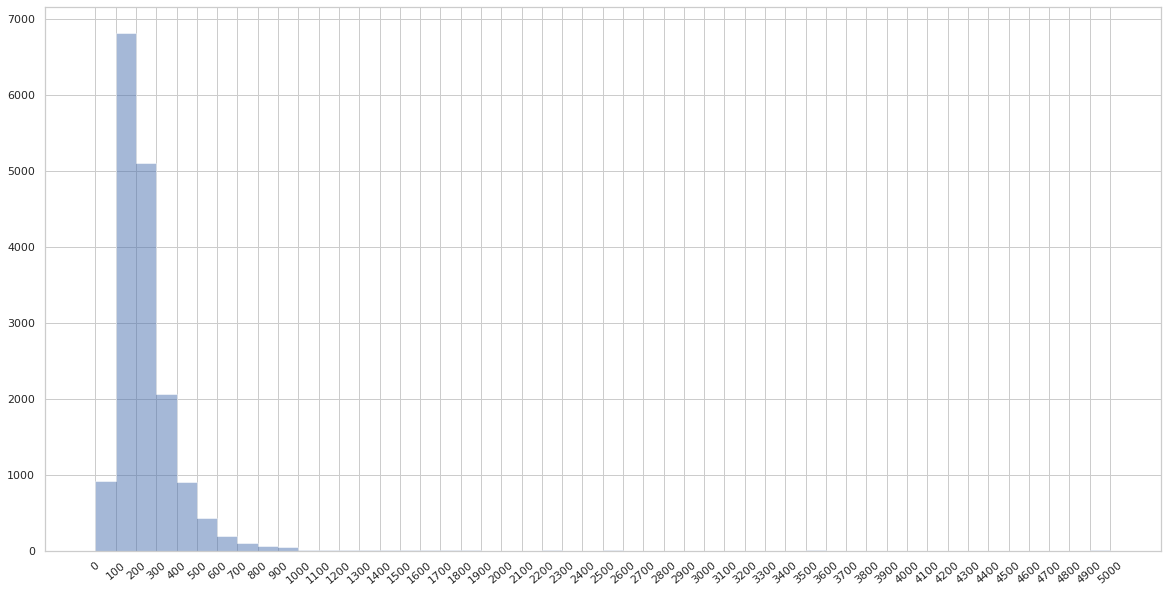

In [142]:
data_to_hist = df.totalyearlycompensation

print(data_to_hist.describe())

step = 100
hist_bins = np.arange(np.min([0, data_to_hist.min()]), 
                      data_to_hist.max() + step, step)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
h = plt.hist(data_to_hist, bins=hist_bins, align='mid', alpha=0.5, histtype='stepfilled')
plt.xticks(h[1], rotation=40)
plt.show()

In [143]:
df[df.totalyearlycompensation.max() == df.totalyearlycompensation]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
7504,5/8/2019 11:09:33,Amazon,SVP,Software Engineering Manager,5000.0,"Seattle, WA",20.0,10.0,AWS,175.0,4822.0,3.0,Male,"Andrew Jassy, SVP AWS. Stock 35431144.",11527.0,819.0,8513
10909,8/3/2019 0:03:43,Google,L11,The Best Software Engineer,5000.0,"Mountain View, CA",56.0,1.0,Android,5000.0,NaN,NaN,Other,NaN,NaN,NaN,12785
12582,9/16/2019 1:24:10,Microsoft,80,Fellow,5000.0,"Seattle, WA",30.0,15.0,Full Stack,500.0,4000.0,500.0,Male,NaN,11527.0,819.0,14879


count     86.000000
mean     270.151163
std      118.533541
min      112.000000
25%      195.000000
50%      250.000000
75%      307.500000
max      858.000000
Name: totalyearlycompensation, dtype: float64


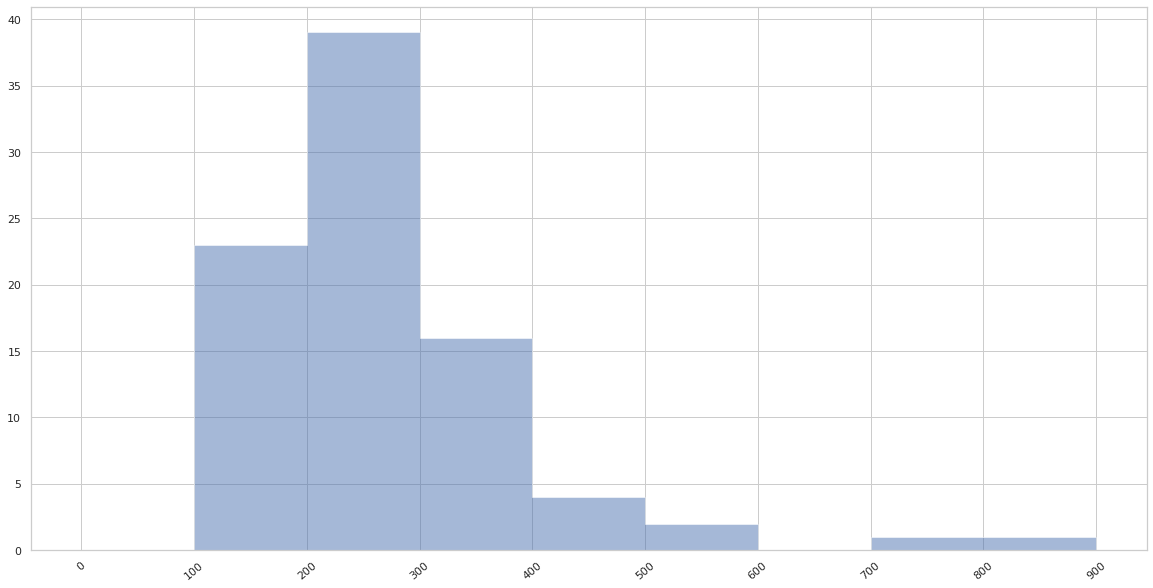

In [144]:
# df.totalyearlycompensation.hist()

data_to_hist = df[(df.title == 'Data Scientist') & (df.location == 'San Francisco, CA')].totalyearlycompensation

print(data_to_hist.describe())

step = 100
hist_bins = np.arange(np.min([0, data_to_hist.min()]), 
                      data_to_hist.max() + step, step)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
h = plt.hist(data_to_hist, bins=hist_bins, align='mid', alpha=0.5, histtype='stepfilled')
plt.xticks(h[1], rotation=40)
plt.show()

In [145]:
# sprawdź, w której firmie zarabia się najwięcej
df.groupby('company').totalyearlycompensation.median().sort_values(ascending=False).head(10)

company
dropbox      517.0
Robinhood    480.0
 Netflix     475.0
 Netflix     472.0
Apple        447.5
Netflix      430.0
broadcom     415.0
grubhub      400.0
Dropbox      400.0
quora        400.0
Name: totalyearlycompensation, dtype: float64

In [146]:
df.company = [c.lower().strip() for c in df.company]

In [147]:
df.groupby('company').totalyearlycompensation.median().sort_values(ascending=False).head(10)

company
robinhood    480.0
netflix      430.0
slack        391.5
snap         360.0
stripe       357.5
apple inc    350.0
airbnb       339.0
dropbox      336.0
twilio       325.0
pinterest    322.5
Name: totalyearlycompensation, dtype: float64

In [148]:
df.title = [t.lower().strip() for t in df.title]

In [149]:
df.groupby('title').totalyearlycompensation.median().sort_values(ascending=False).head(10)

title
fellow                                5000.0
the best software engineer            5000.0
controller                            1000.0
senior bagger                         1000.0
senior staff software engineer         964.0
partner director                       960.0
software engineering director          925.0
president windows and windows live     845.0
vp software                            800.0
sr. software development manager       716.0
Name: totalyearlycompensation, dtype: float64

In [150]:
df.groupby('location').totalyearlycompensation.median().sort_values(ascending=False).head(10)

location
Northridge, CA                          700.0
San Francisco                           693.0
Aspen, CO                               650.0
Venice, CA                              517.0
Illinois City, IL                       510.0
Livermore, CA                           465.0
Wimborne Minster, EN, United Kingdom    444.0
Los Gatos, CA                           425.0
San Fancisco, CA                        420.0
Nazareth Illit, HZ, Israel              390.0
Name: totalyearlycompensation, dtype: float64

In [151]:
position_df = df[(df.title == 'data scientist') | (df.title == 'software engineer')]

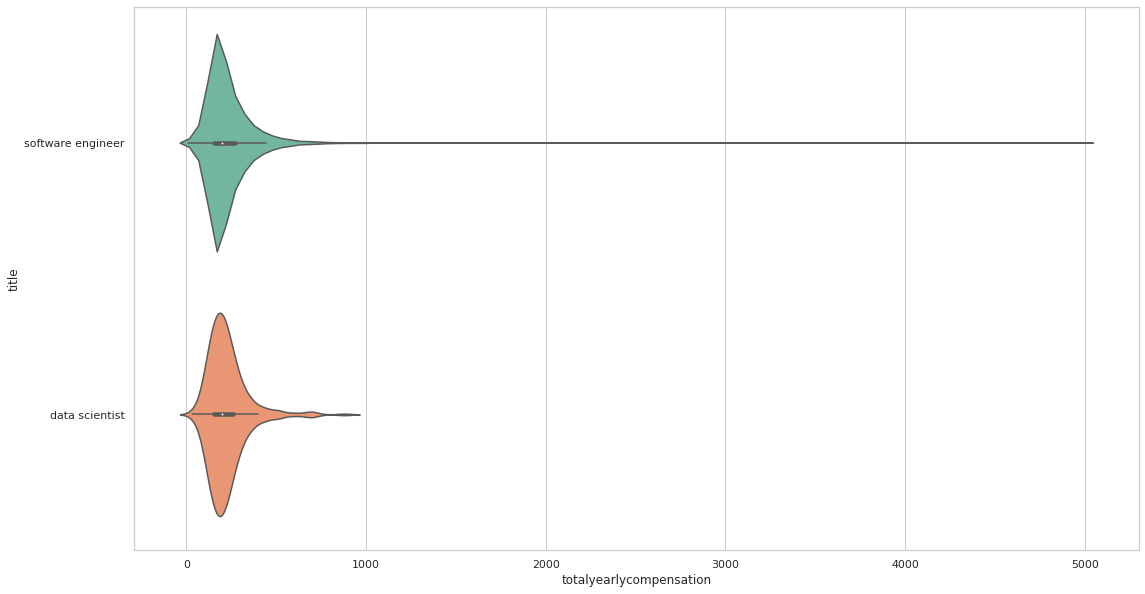

In [152]:
plt.figure(figsize=(18, 10))
# Just switch x and y
sns.violinplot( y=position_df["title"], x=position_df["totalyearlycompensation"], palette="Set2")

In [153]:
position_df["totalyearlycompensation"]

1        100.0
3        578.0
5        173.0
7        270.0
8        157.0
         ...  
16675    168.0
16676    132.0
16678     56.0
16679    175.0
16680    323.0
Name: totalyearlycompensation, Length: 11795, dtype: float64

In [173]:
df.location

0                Redwood City, CA
1               San Francisco, CA
2                     Seattle, WA
3               San Francisco, CA
4                     Redmond, WA
                   ...           
16678    Singapore, SG, Singapore
16679           San Francisco, CA
16680               Palo Alto, CA
16681                  Austin, TX
16682        Bangalore, KA, India
Name: location, Length: 16683, dtype: object

In [176]:
position_df2 = df[(df.location=='Seattle, WA')&((df.title == 'data scientist') | (df.title == 'software engineer'))]

In [177]:
position_df2

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber
9,6/20/2017 18:49:59,amazon,L5,software engineer,190.0,"Seattle, WA",3.0,3.0,NaN,110000.0,80000.0,NaN,NaN,NaN,11527.0,819.0,10
10,6/21/2017 17:27:47,microsoft,63,software engineer,208.0,"Seattle, WA",8.5,8.5,NaN,NaN,NaN,NaN,NaN,NaN,11527.0,819.0,11
12,6/22/2017 13:55:26,microsoft,62,software engineer,156.0,"Seattle, WA",4.0,4.0,NaN,135.0,8.0,13.0,NaN,NaN,11527.0,819.0,13
15,6/26/2017 21:25:45,microsoft,63,software engineer,201.0,"Seattle, WA",12.0,6.0,NaN,157.0,26.0,28.0,NaN,NaN,11527.0,819.0,16
16,6/29/2017 15:14:16,microsoft,59,software engineer,137.0,"Seattle, WA",1.0,1.0,NaN,110000.0,16000.0,11000.0,NaN,NaN,11527.0,819.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16668,1/10/2020 19:17:12,amazon,L5,software engineer,250.0,"Seattle, WA",5.0,3.0,Full Stack,150.0,100.0,0.0,Female,NaN,11527.0,819.0,20011
16670,1/10/2020 19:32:52,amazon,L5,software engineer,195.0,"Seattle, WA",3.0,1.5,ML / AI,145.0,50.0,0.0,Male,"60,000 signing bonus - Masters",11527.0,819.0,20013
16672,1/10/2020 20:07:22,oracle,IC-2,software engineer,180.0,"Seattle, WA",1.0,0.0,Security,140.0,40.0,0.0,Female,Sign-on 20K,11527.0,819.0,20016
16673,1/10/2020 20:10:41,compass,Entry-Level,software engineer,179.0,"Seattle, WA",1.0,0.0,Web Development (Front-End),136.0,30.0,13.0,Female,Bonus is given in RSUs with 4 yr vesting sched...,11527.0,819.0,20017


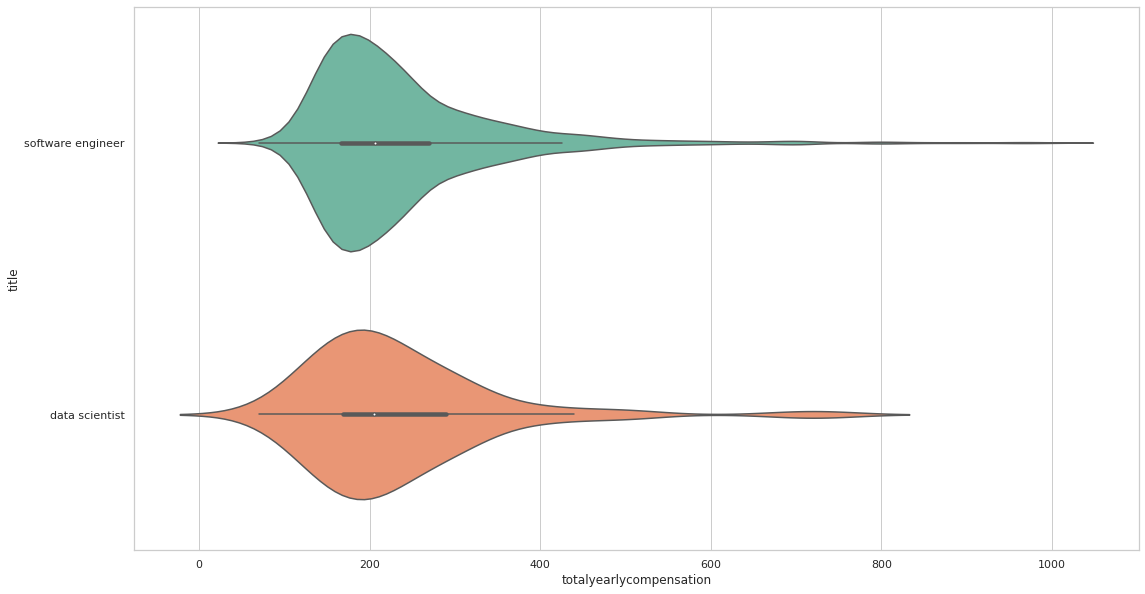

In [178]:
plt.figure(figsize=(18, 10))
# Just switch x and y
sns.violinplot( y=position_df2["title"], x=position_df2["totalyearlycompensation"], palette="Set2")

## Dobry czy zły wykres?

- https://ceny.szybko.pl/Warszawa-ceny-mieszkan.html

## Inne ciekawe biblioteki
- https://plot.ly/python/
- https://docs.bokeh.org/en/latest/index.html
- http://www.pygal.org/en/latest/index.html
- http://ggplot.yhathq.com/

In [136]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()